In [25]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/garcia-damian/Data-Science-Fundamentals/643f1ee906b2675242c38eceadefff4d492d4cff/dataset-preentrega.csv'
df = pd.read_csv(url, sep=',')
df.head()

,auction_id,ConvertedDateTime,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,placement_language,website_id,referer_deep_three,ua_country,ua_os,ua_browser,ua_browser_version,ua_device,user_average_seconds_played,seconds_played
0,79e1a817-5cdf-4647-b1bc-085eef59fd6f,2018-01-30 00:00,28,198703,215548,2211,44411,es,30467,com/apertura/realstate,ar,iOS,Safari mobile,11.0,Phone,NaN,2
1,7cc34d53-d211-4fd3-ab70-8380f6578f54,2018-01-30 17:34,26,202215,215127,6809,48065,en,32298,pe/rpp/peru,pe,Android,Chrome Mobile,55.0,Phone,NaN,0
2,7df839f1-e279-4640-99ee-48b497c3e952,2018-01-30 02:13,15,198514,215163,3978,43247,en,29786,com/destinationtips/air-travel,us,iOS,Facebook App,NaN,Tablet,NaN,10
3,7f7ce586-e5ea-4320-be44-b3955801451d,2018-01-30 12:28,90,200028,212177,8730,42455,pt,29417,com.br/baixaki/download,br,Windows,Chrome,62.0,PersonalComputer,NaN,37
4,80a2c52d-c26b-4950-9fa8-cad9c489f22b,2018-01-30 15:54,9,197250,208437,4699,44662,de,30587,de/dogforum/index.php,at,iOS,Safari mobile,11.0,Phone,NaN,2


In [26]:
df.shape

(15162, 17)

In [4]:
df['creative_id'] = df['creative_id'].astype(str)
df['campaign_id'] = df['campaign_id'].astype(str)
df['advertiser_id'] = df['advertiser_id'].astype(str)
df['placement_id'] = df['placement_id'].astype(str)
df['website_id'] = df['website_id'].astype(str)
df['ua_browser_version'] = df['ua_browser_version'].astype(str)
df.describe().round(1)

,creative_duration,user_average_seconds_played,seconds_played
count,15162.0,4527.0,15162.0
mean,26.8,9.7,5.8
std,25.6,10.2,8.1
min,5.0,0.0,0.0
25%,14.0,2.0,0.0
50%,18.0,7.5,3.0
75%,29.0,15.0,9.0
max,135.0,91.0,135.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15162 entries, 0 to 15161
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   auction_id                   15162 non-null  object 
 1   ConvertedDateTime            15162 non-null  object 
 2   creative_duration            15162 non-null  int64  
 3   creative_id                  15162 non-null  object 
 4   campaign_id                  15162 non-null  object 
 5   advertiser_id                15162 non-null  object 
 6   placement_id                 15162 non-null  object 
 7   placement_language           15162 non-null  object 
 8   website_id                   15162 non-null  object 
 9   referer_deep_three           15158 non-null  object 
 10  ua_country                   15162 non-null  object 
 11  ua_os                        15162 non-null  object 
 12  ua_browser                   15162 non-null  object 
 13  ua_browser_versi

In [6]:
print(df.isnull().sum())

auction_id                         0
ConvertedDateTime                  0
creative_duration                  0
creative_id                        0
campaign_id                        0
advertiser_id                      0
placement_id                       0
placement_language                 0
website_id                         0
referer_deep_three                 4
ua_country                         0
ua_os                              0
ua_browser                         0
ua_browser_version                 0
ua_device                          3
user_average_seconds_played    10635
seconds_played                     0
dtype: int64


La columna user_average_seconds_played tiene +70% de valores nulos, por lo que lo mejor es eliminarla.

In [7]:
df = df.drop('user_average_seconds_played', axis=1)
df.head()

,auction_id,ConvertedDateTime,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,placement_language,website_id,referer_deep_three,ua_country,ua_os,ua_browser,ua_browser_version,ua_device,seconds_played
0,79e1a817-5cdf-4647-b1bc-085eef59fd6f,2018-01-30 00:00,28,198703,215548,2211,44411,es,30467,com/apertura/realstate,ar,iOS,Safari mobile,11.0,Phone,2
1,7cc34d53-d211-4fd3-ab70-8380f6578f54,2018-01-30 17:34,26,202215,215127,6809,48065,en,32298,pe/rpp/peru,pe,Android,Chrome Mobile,55.0,Phone,0
2,7df839f1-e279-4640-99ee-48b497c3e952,2018-01-30 02:13,15,198514,215163,3978,43247,en,29786,com/destinationtips/air-travel,us,iOS,Facebook App,nan,Tablet,10
3,7f7ce586-e5ea-4320-be44-b3955801451d,2018-01-30 12:28,90,200028,212177,8730,42455,pt,29417,com.br/baixaki/download,br,Windows,Chrome,62.0,PersonalComputer,37
4,80a2c52d-c26b-4950-9fa8-cad9c489f22b,2018-01-30 15:54,9,197250,208437,4699,44662,de,30587,de/dogforum/index.php,at,iOS,Safari mobile,11.0,Phone,2


Ya que la fecha es constante para todas las subastas, vamos a extraer la hora a a una columna aparte, de forma que podamos analizar la estacionalidad a partir de esa variable, ya que es muy importante para la industria

In [8]:
df['Hour'] = df['ConvertedDateTime'].apply(lambda x: pd.to_datetime(x).hour)
df = df[['auction_id', 'ConvertedDateTime', 'Hour'] + [col for col in df.columns if col not in ['auction_id', 'ConvertedDateTime', 'Hour']]]
df.head()


,auction_id,ConvertedDateTime,Hour,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,placement_language,website_id,referer_deep_three,ua_country,ua_os,ua_browser,ua_browser_version,ua_device,seconds_played
0,79e1a817-5cdf-4647-b1bc-085eef59fd6f,2018-01-30 00:00,0,28,198703,215548,2211,44411,es,30467,com/apertura/realstate,ar,iOS,Safari mobile,11.0,Phone,2
1,7cc34d53-d211-4fd3-ab70-8380f6578f54,2018-01-30 17:34,17,26,202215,215127,6809,48065,en,32298,pe/rpp/peru,pe,Android,Chrome Mobile,55.0,Phone,0
2,7df839f1-e279-4640-99ee-48b497c3e952,2018-01-30 02:13,2,15,198514,215163,3978,43247,en,29786,com/destinationtips/air-travel,us,iOS,Facebook App,nan,Tablet,10
3,7f7ce586-e5ea-4320-be44-b3955801451d,2018-01-30 12:28,12,90,200028,212177,8730,42455,pt,29417,com.br/baixaki/download,br,Windows,Chrome,62.0,PersonalComputer,37
4,80a2c52d-c26b-4950-9fa8-cad9c489f22b,2018-01-30 15:54,15,9,197250,208437,4699,44662,de,30587,de/dogforum/index.php,at,iOS,Safari mobile,11.0,Phone,2


Vamos a importar Matplotlib y Seaborn para realizar el ejercicio

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Para el primer gráfico, vamos a ver la distribución del engagement por frecuencia en cada tipo de dispositivo.
Primero lo realizamos con Matplotlib

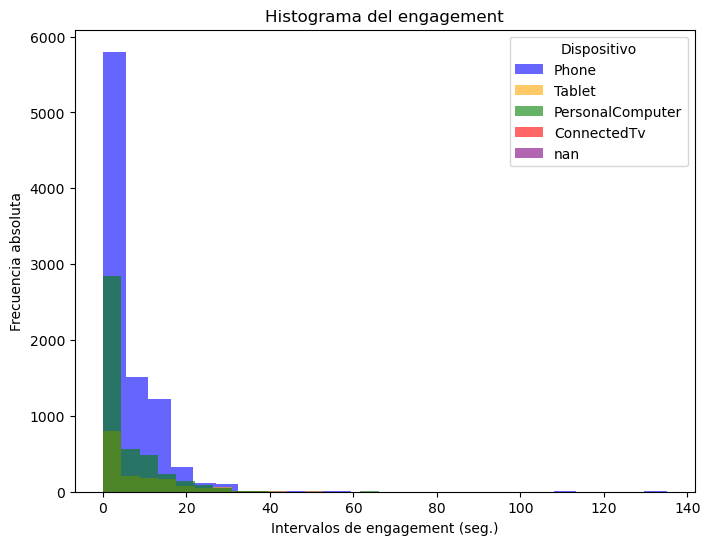

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los dispositivos únicos
devices = df['ua_device'].unique()

# Definir los colores para cada dispositivo
colors = {'Phone': 'blue', 'Tablet': 'orange', 'PersonalComputer': 'green', 'ConnectedTv': 'red', np.nan: 'purple'}

fig, ax = plt.subplots(figsize=(8, 6))

# Crear histogramas apilados
for device in devices:
    subset = df[df['ua_device'] == device]
    ax.hist(subset['seconds_played'], bins=25, alpha=0.6, label=device, color=colors.get(device, 'purple'), stacked=True)

ax.set_title('Histograma del engagement')
ax.set_xlabel('Intervalos de engagement (seg.)')
ax.set_ylabel('Frecuencia absoluta')
ax.legend(title='Dispositivo')

plt.show()


Ahora haremos lo mismo con Seaborn

c:\Users\thega\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\thega\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\thega\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\thega\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a

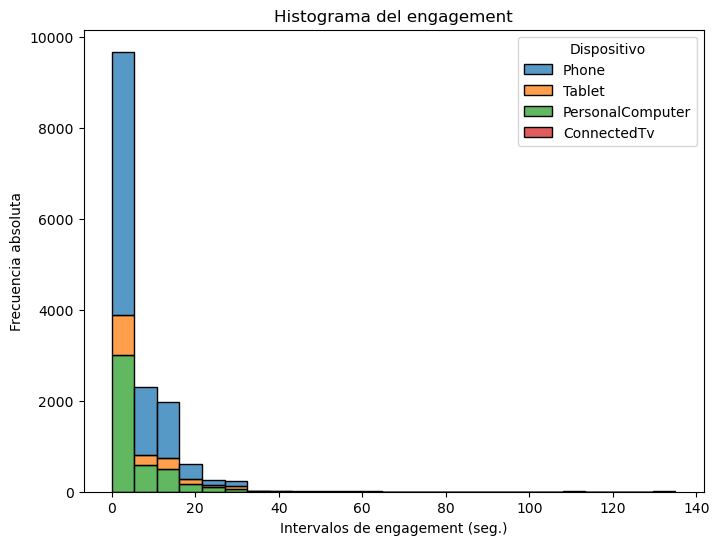

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df, x='seconds_played', bins=25, ax=ax, hue='ua_device', multiple='stack')
ax.set_title('Histograma del engagement')
ax.set_xlabel('Intervalos de engagement (seg.)')
ax.set_ylabel('Frecuencia absoluta')
leg = ax.get_legend()
leg.set_title('Dispositivo')
plt.show()


Otro posible análisis es cómo se distribuye el promedio de segundos reproducidos a lo largo del día según el idioma donde se ubica el espacio publicitario. Podriamos verlo por país pero tendríamos los datos mucho más segregados, por lo que el idioma puede ser representativo de la cultura y zona horaria de los usuarios. Primero lo veremos con Matplotlib:

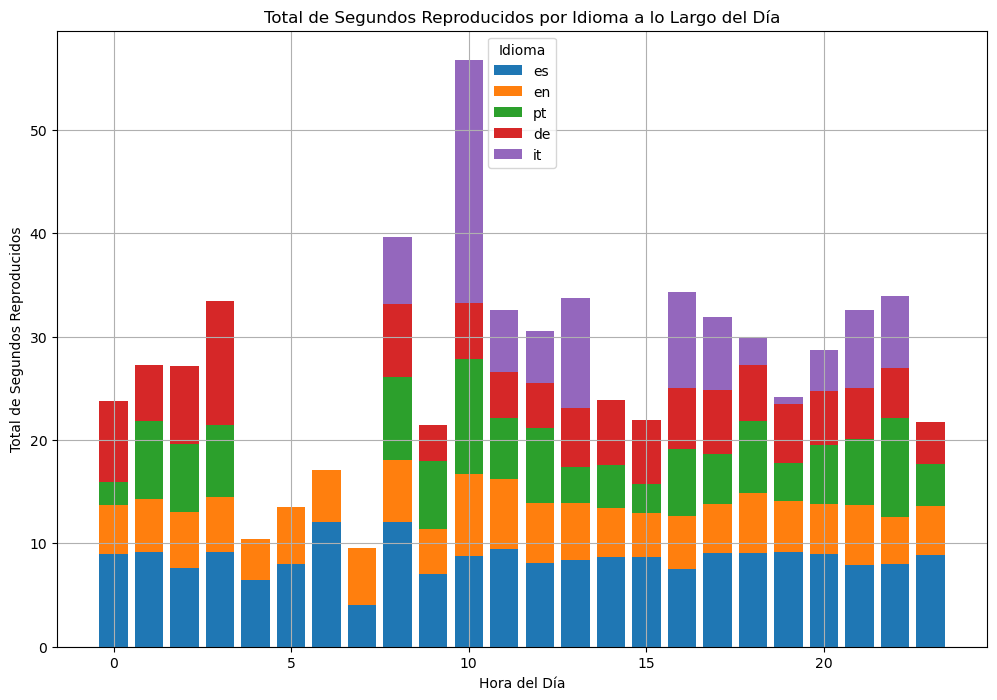

In [21]:
# Obtener idiomas únicos
idiomas = df['placement_language'].unique()
horas = np.sort(df['Hour'].unique())  # Ordenar horas para una mejor visualización

# Inicializar un array para almacenar los segundos totales reproducidos para cada hora y cada idioma
segundos_totales = np.zeros((len(horas), len(idiomas)))

fig, ax = plt.subplots(figsize=(12, 8))

# Iterar sobre los idiomas
for i, idioma in enumerate(idiomas):
    subconjunto = df[df['placement_language'] == idioma]
    # Calcular los segundos totales reproducidos para cada hora y cada idioma
    for j, hora in enumerate(horas):
        segundos_totales[j, i] = subconjunto[subconjunto['Hour'] == hora]['seconds_played'].mean()

# Dibujar barras apiladas
bottom = np.zeros(len(horas))
for i, idioma in enumerate(idiomas):
    ax.bar(horas, segundos_totales[:, i], label=idioma, bottom=bottom)
    bottom += segundos_totales[:, i]

# Añadir etiquetas y título
ax.set_xlabel('Hora del Día')
ax.set_ylabel('Total de Segundos Reproducidos')
ax.set_title('Total de Segundos Reproducidos por Idioma a lo Largo del Día')
ax.legend(title='Idioma')
ax.grid(True)

plt.show()


Ahora haremos los propio con Seaborn:

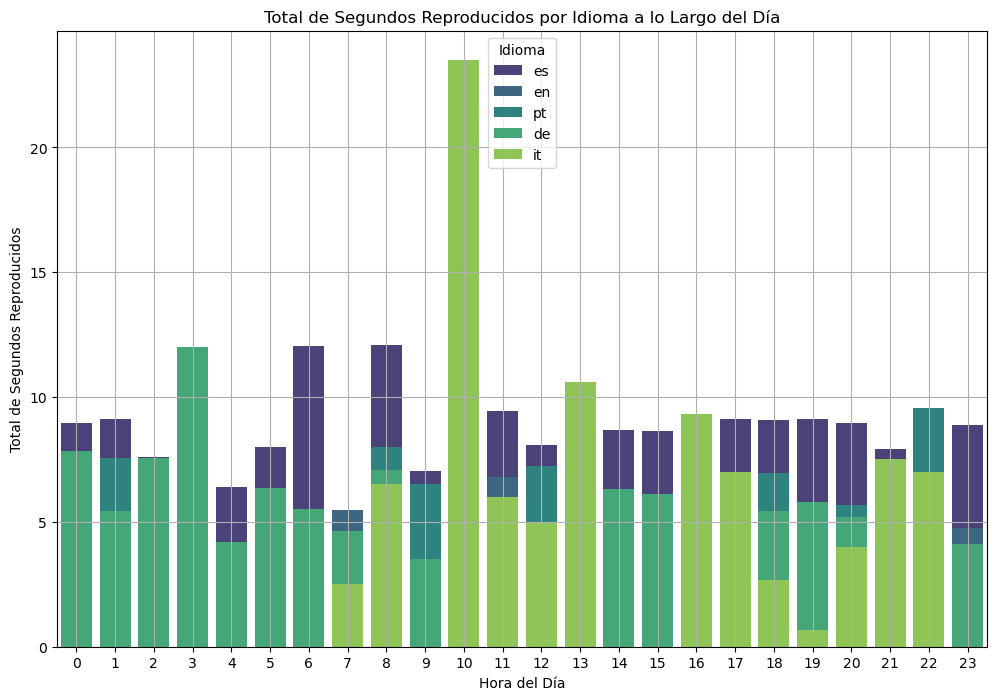

In [20]:
# Obtener idiomas únicos
idiomas = df['placement_language'].unique()
horas = np.sort(df['Hour'].unique())  # Ordenar horas para una mejor visualización

# Inicializar un DataFrame para almacenar los datos
data = {'Hora': np.repeat(horas, len(idiomas)),
        'Idioma': np.tile(idiomas, len(horas)),
        'Total de Segundos Reproducidos': np.zeros(len(horas) * len(idiomas))}

df_stacked = pd.DataFrame(data)

# Calcular los segundos totales reproducidos para cada hora y cada idioma
for i, hora in enumerate(horas):
    for idioma in idiomas:
        subset = df[(df['Hour'] == hora) & (df['placement_language'] == idioma)]
        total_segundos = subset['seconds_played'].mean()
        df_stacked.loc[(df_stacked['Hora'] == hora) & (df_stacked['Idioma'] == idioma), 'Total de Segundos Reproducidos'] = total_segundos

plt.figure(figsize=(12, 8))

# Crear gráfico de barras apiladas con Seaborn
sns.barplot(data=df_stacked, x='Hora', y='Total de Segundos Reproducidos', hue='Idioma', palette='viridis', errorbar=None, dodge=False)

# Añadir etiquetas y título
plt.xlabel('Hora del Día')
plt.ylabel('Total de Segundos Reproducidos')
plt.title('Total de Segundos Reproducidos por Idioma a lo Largo del Día')
plt.legend(title='Idioma')
plt.grid(True)

plt.show()



Otro análisis interesante puede ser la distribución del engagement a través de los diferentes sistemas operativos donde se ubican estos espacios publicitarios. Primero haremos el análisis con Matplotlib:

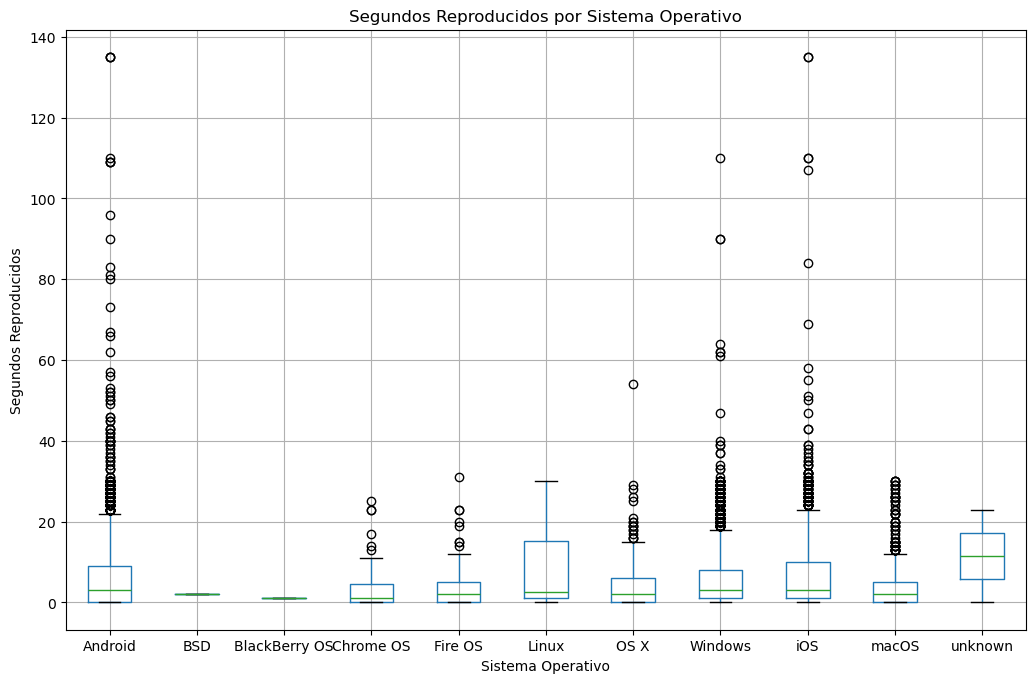

In [19]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Crear el boxplot
df.boxplot(column='seconds_played', by='ua_os', ax=ax)

# Configurar etiquetas y título
ax.set_title('Segundos Reproducidos por Sistema Operativo')
ax.set_xlabel('Sistema Operativo')
ax.set_ylabel('Segundos Reproducidos')

# Eliminar el título automático generado por `boxplot`
plt.suptitle('')

# Mostrar el gráfico
plt.show()


Luego realizaremos el mismo análisis con Seaborn:

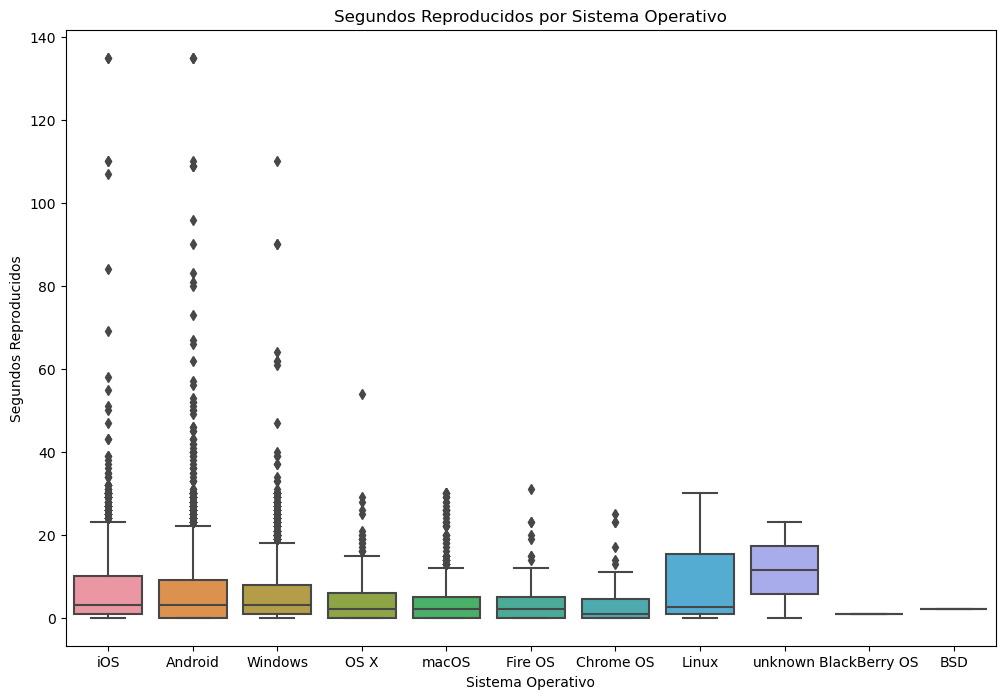

In [18]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Crear el boxplot
sns.boxplot(data=df, x='ua_os', y='seconds_played', ax=ax)

# Configurar etiquetas y título
ax.set_title('Segundos Reproducidos por Sistema Operativo')
ax.set_xlabel('Sistema Operativo')
ax.set_ylabel('Segundos Reproducidos')

# Mostrar el gráfico
plt.show()
